In [12]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

Shape of the image array: (256, 256)
Data type of the image array: uint8
Minimum pixel value: 7
Maximum pixel value: 253


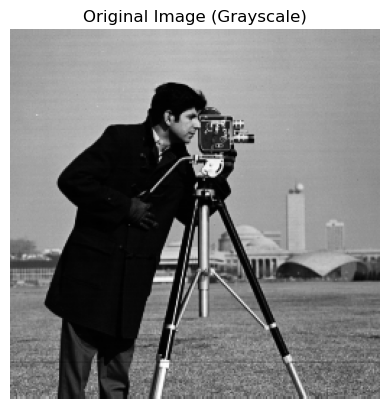

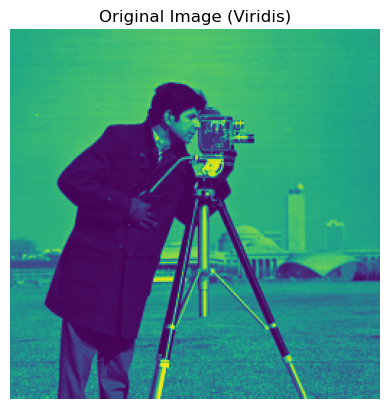

In [13]:
# Importowanie obrazu i konwersja na tablicę numpy
image_path = 'cameraman.tif'
image = Image.open(image_path)
image_array = np.array(image)

# Wydrukowanie podstawowych informacji o tablicy
print("Shape of the image array:", image_array.shape)
print("Data type of the image array:", image_array.dtype)
print("Minimum pixel value:", np.min(image_array))
print("Maximum pixel value:", np.max(image_array))

# Wyświetlenie obrazu w skali szarości
plt.imshow(image_array, cmap='gray')
plt.title("Original Image (Grayscale)")
plt.axis('off')
plt.show()

# Wyświetlenie obrazu w skali viridis
plt.imshow(image_array, cmap='viridis')
plt.title("Original Image (Viridis)")
plt.axis('off')
plt.show()

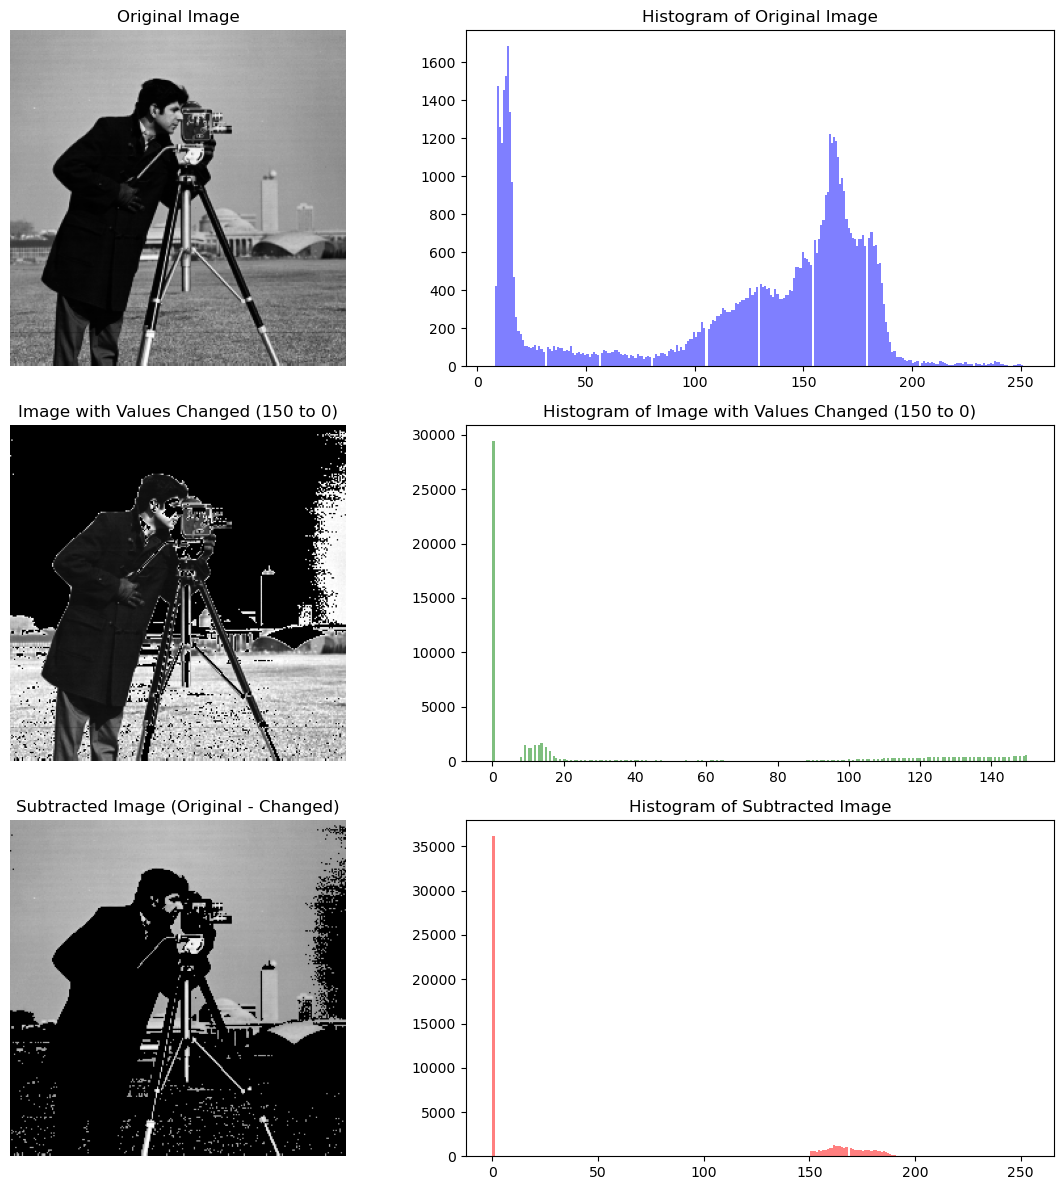

In [14]:
# Przycięcie części obrazu
cropped_image = image_array[50:150, 100:200]

# Zmiana wartości pikseli oryginalnego obrazu
modified_image = np.where(image_array > 150, 0, image_array.copy())

# Odejmowanie: oryginał - zmieniony
subtracted_image = image_array - modified_image

# Wyświetlenie obrazów i porównanie histogramów
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].imshow(image_array, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

axes[0, 1].hist(image_array.flatten(), bins=256, color='blue', alpha=0.5)
axes[0, 1].set_title("Histogram of Original Image")

axes[1, 0].imshow(modified_image, cmap='gray')
axes[1, 0].set_title("Image with Values Changed (150 to 0)")
axes[1, 0].axis('off')

axes[1, 1].hist(modified_image.flatten(), bins=256, color='green', alpha=0.5)
axes[1, 1].set_title("Histogram of Image with Values Changed (150 to 0)")

axes[2, 0].imshow(subtracted_image, cmap='gray')
axes[2, 0].set_title("Subtracted Image (Original - Changed)")
axes[2, 0].axis('off')

axes[2, 1].hist(subtracted_image.flatten(), bins=256, color='red', alpha=0.5)
axes[2, 1].set_title("Histogram of Subtracted Image")

plt.tight_layout()
plt.show()

In [15]:
# Zapisanie dwóch tablic jako obrazy
Image.fromarray(modified_image).save('modified_image.png')
Image.fromarray(subtracted_image).save('subtracted_image.png')

# Otwarcie i wyświetlenie obrazów
modified_image_opened = Image.open('modified_image.png')
subtracted_image_opened = Image.open('subtracted_image.png')

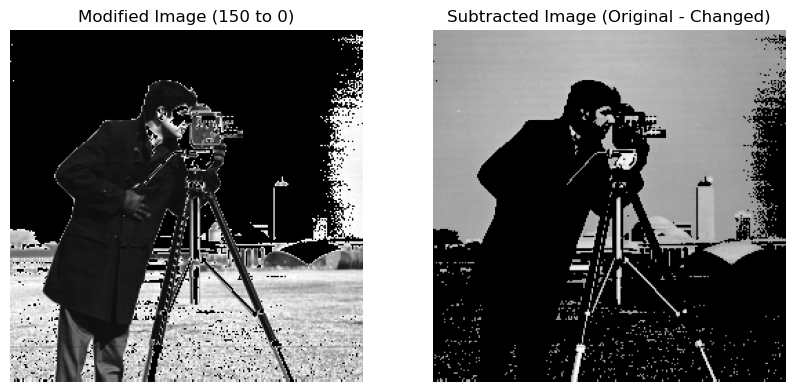

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(modified_image_opened, cmap='gray')
axes[0].set_title("Modified Image (150 to 0)")
axes[0].axis('off')

axes[1].imshow(subtracted_image_opened, cmap='gray')
axes[1].set_title("Subtracted Image (Original - Changed)")
axes[1].axis('off')

plt.show()